# Research Question 2 - Striking vs Grappling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import html5lib

import requests 
from bs4 import BeautifulSoup
import urllib
import time

The main csv was read in

In [2]:
main = pd.read_csv("final.csv")

## Win Type by Weight Class

The dataframe was grouped by Weight Class and Weight Class Index, and the sum of all knockout wins, submission wins and decision wins was found. New columns were then added of each win type as a percentage of total wins.

In [3]:
winType = main.groupby(["Weight Class", "Weight Class Index"])["k_wins","sb_wins","d_wins"].sum().reset_index()

winType["k_wins_p"] = winType["k_wins"]/(winType["k_wins"] + winType["sb_wins"] + winType["d_wins"])
winType["sb_wins_p"] = winType["sb_wins"]/(winType["k_wins"] + winType["sb_wins"] + winType["d_wins"])
winType["d_wins_p"] = winType["d_wins"]/(winType["k_wins"] + winType["sb_wins"] + winType["d_wins"])

The irrlevant column were then droped and the dataframe was ordered by Weight Class Index

In [4]:
winType = winType.drop(["k_wins" , "sb_wins", "d_wins"] , axis='columns')

winType = winType.sort_values(by='Weight Class Index' ,ascending = True)
winType.head(5)

,Weight Class,Weight Class Index,k_wins_p,sb_wins_p,d_wins_p
3,Heavyweight,0,0.565445,0.251309,0.183246
4,Light heavyweight,1,0.528642,0.256956,0.214403
6,Middleweight,2,0.425614,0.239327,0.335058
7,Welterweight,3,0.433597,0.258575,0.307828
5,Lightweight,4,0.382550,0.314477,0.302972


A graph was then plotted of each Win Type Percent vs Weight Class. 

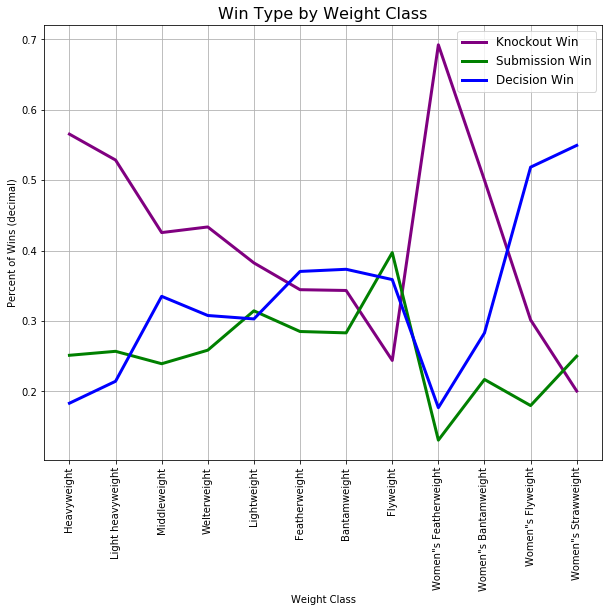

In [5]:
plt.figure(figsize=(10,8))  #declare the figure size, it's quite small by default.

plt.plot("Weight Class", "k_wins_p", data=winType, marker="", color="purple", linewidth=3) 
plt.plot("Weight Class", "sb_wins_p", data=winType, marker="", color="green", linewidth=3) 
plt.plot("Weight Class", "d_wins_p", data=winType, marker="", color="blue", linewidth=3)  


plt.title("Win Type by Weight Class", fontsize=16) # create the chart title and axis labels
plt.xlabel("Weight Class")
plt.ylabel("Percent of Wins (decimal)")
plt.xticks(rotation=90)
plt.grid()

plt.rcParams.update({'font.size': 16})


L=plt.legend(prop={'size': 12})
L.get_texts()[0].set_text('Knockout Win')
L.get_texts()[1].set_text('Submission Win')
L.get_texts()[2].set_text('Decision Win')


In the above graph, we look at how the win type differs by weight class. It's clear that the heavier weight classes (left side of graph) rely on knockouts to win fights, whereas the lighter men's weight classes are able to use other aspects of their game(other than striking) to win i.e. grappling.

Meanwhile for the woman's weight classes, there hasn't been enough fights for us to read into the results too much. For example, the woman's featherweight spikes up on knockout wins but this is the newest weight class to offically be part of the UFC so we would have to wait a few more years to make an analytical assumption about this weight class

Submisissions victories are lower amongst the female weight classes. The jiu jitsu side of womens MMA must be lagging behind. As the sport develops these numbers will most likely increase.

## Champion Striking vs Takedown Accuracy

A new dataframe was created to find out how the champions striking and takedown accuracy compares with the average.

In [6]:
champ_acc = main[['Name', 'st_land','st_attemp','tk_land','tk_attemp',"Rank"]]
champ_acc.head(5)

,Name,st_land,st_attemp,tk_land,tk_attemp,Rank
0,Andrei Arlovski,749.0,1790.0,7.0,25.0,15.0
1,Andrei Arlovski,749.0,1790.0,7.0,25.0,15.0
2,Alistair Overeem,442.0,605.0,3.0,13.0,7.0
3,Cain Velasquez,719.0,1249.0,34.0,81.0,8.0
4,Cain Velasquez,719.0,1249.0,34.0,81.0,8.0


Striking accuracy was found by dividing strikes landed by strikes attempted and takedown accuracy was found by dividing takedowns landed by attemped


In [7]:
champ_acc['st_acc'] = champ_acc['st_land']/champ_acc['st_attemp']
champ_acc['tk_acc'] = champ_acc['tk_land']/champ_acc['tk_attemp']
champ_acc.head(5)

C:\Users\Lorcan Rooney\Anaconda3\envs\env_name\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Lorcan Rooney\Anaconda3\envs\env_name\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Name,st_land,st_attemp,tk_land,tk_attemp,Rank,st_acc,tk_acc
0,Andrei Arlovski,749.0,1790.0,7.0,25.0,15.0,0.418436,0.280000
1,Andrei Arlovski,749.0,1790.0,7.0,25.0,15.0,0.418436,0.280000
2,Alistair Overeem,442.0,605.0,3.0,13.0,7.0,0.730579,0.230769
3,Cain Velasquez,719.0,1249.0,34.0,81.0,8.0,0.575661,0.419753
4,Cain Velasquez,719.0,1249.0,34.0,81.0,8.0,0.575661,0.419753


The uselesss column were dropped. A new dataframe was created that will be used later and all non champs in the champs_acc dataframe were removed

In [8]:
champ_acc = champ_acc.drop(['st_land','st_attemp','tk_land','tk_attemp'], axis=1)
non_champ_acc = champ_acc
champ_acc = champ_acc.loc[champ_acc['Rank'] == 0]

The rank column and duplicates were dropped. Names were changed to last names only as it looked better in the project presentation

In [9]:
champ_acc = champ_acc.drop(['Rank'], axis=1)
champ_acc = champ_acc.drop_duplicates(keep='first')

champ_acc['Name'] = champ_acc['Name'].map(lambda x: x.split(' ')[1].strip())
champ_acc = champ_acc.set_index('Name')
champ_acc.head(5)

,st_acc,tk_acc
Name,,
Cormier,0.513136,0.377778
Jones,0.572687,0.423529
Whittaker,0.407154,0.571429
Usman,0.541329,0.337349
Nurmagomedov,0.496599,0.422414


A chart was plotted of striking accuracy vs takedown accuracy for the champs. The lines represent the mean striking accuracy for the __entire ufc__ , not just the champs. 

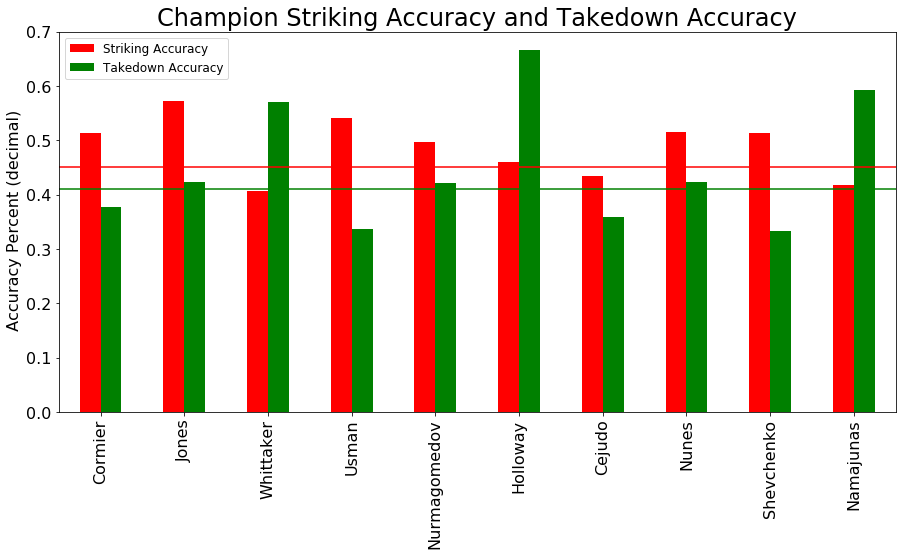

In [10]:
fig,ax= plt.subplots()


champ_acc.plot(kind="bar", ax=ax, color=['r', 'g', 'b'],figsize=(15,7))

st_acc_mean = non_champ_acc["st_acc"].mean()
ax.axhline(st_acc_mean, color = 'r')

tk_acc_mean = non_champ_acc["tk_acc"].mean()
ax.axhline(tk_acc_mean, color = 'g')


plt.title("Champion Striking Accuracy and Takedown Accuracy", fontsize=24)
plt.xlabel("")
plt.ylabel(" Accuracy Percent (decimal)")

plt.rcParams.update({'font.size': 24})
L=plt.legend(loc = 'upper left', prop={'size': 12})

L.get_texts()[0].set_text('Striking Accuracy')
L.get_texts()[1].set_text('Takedown Accuracy')



This graph could be misleading, because if you throw 1 strike and land 1 you have a high accuracy. Similar if you land more than anyone in the UFC but you attempt four times as much as anyone, you will have a bad striking accuracy. Interestingly, most of the champs have a higher striking accuracy than the average ufc fighter, which shows striking accuracy must be, somewhat, important.

Takedown accuracy is a bit more random as a lot less takedowns are thrown than strikes, which makes the accuracys a bit more random. Numerous champions have a takedown accuracy well below the mean

## Win Type Percent For Champions 

A new dataframe was created with names, ranks and win types (knockout, submission and decision). Each win type was found as a percentage of total wins.

In [11]:
win_percen = main[["Name",'k_wins','sb_wins','d_wins',"Rank"]]

win_percen['k_wins_p'] = win_percen['k_wins']/(win_percen['k_wins'] + win_percen['sb_wins'] + win_percen['d_wins'])
win_percen['sb_wins_p'] = win_percen['sb_wins']/(win_percen['k_wins'] + win_percen['sb_wins'] + win_percen['d_wins'])
win_percen['d_wins_p'] = win_percen['d_wins']/(win_percen['k_wins'] + win_percen['sb_wins'] + win_percen['d_wins'])

win_percen = win_percen.drop(['k_wins','sb_wins','d_wins'], axis=1)



C:\Users\Lorcan Rooney\Anaconda3\envs\env_name\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Lorcan Rooney\Anaconda3\envs\env_name\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Lorcan Rooney\Anaconda3\envs\env_name\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

All fighters that arent champions were then dropped, as well as the rank column and all duplicates

In [12]:
win_percen = win_percen.loc[win_percen['Rank'] == 0]
win_percen = win_percen.drop(['Rank'], axis=1)
win_percen = win_percen.drop_duplicates(keep='first')

Again first names were dropped for readabilty

In [13]:
win_percen['Name'] = win_percen['Name'].map(lambda x: x.split(' ')[1].strip())
win_percen = win_percen.set_index('Name')
win_percen

,k_wins_p,sb_wins_p,d_wins_p
Name,,,
Cormier,0.450000,0.200000,0.350000
Jones,0.434783,0.260870,0.304348
Whittaker,0.476190,0.238095,0.285714
Usman,0.461538,0.076923,0.461538
Nurmagomedov,0.307692,0.307692,0.384615
Holloway,0.500000,0.100000,0.400000
Cejudo,0.416667,0.000000,0.583333
Nunes,0.705882,0.176471,0.117647
Shevchenko,0.250000,0.437500,0.312500


A chart was then plotted of the champions and their win types as percents of total wins 

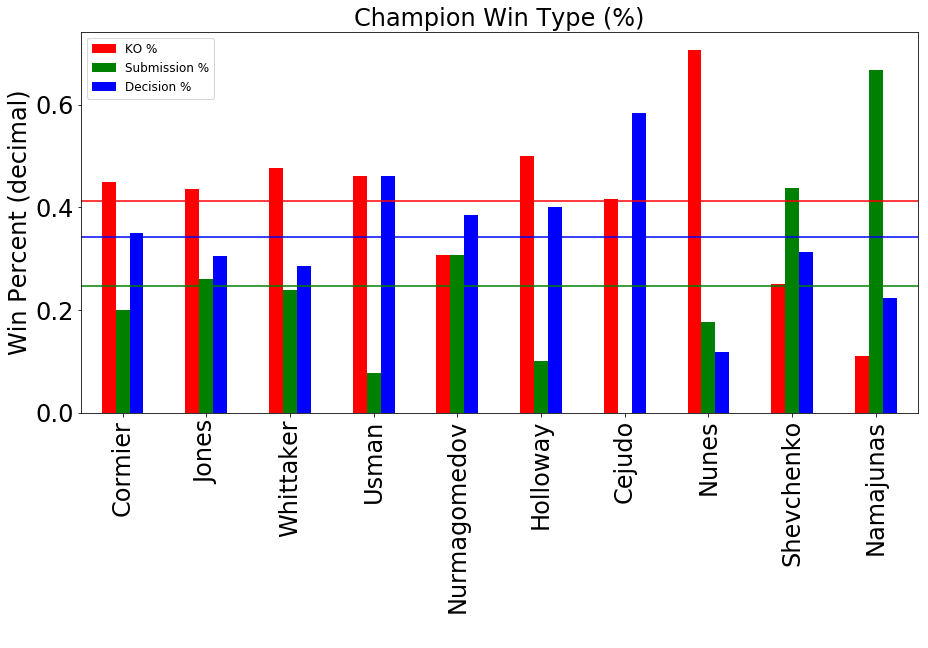

In [14]:
fig,ax= plt.subplots()
plt.rcParams.update({'font.size': 12.5})

win_percen.plot(kind="bar", ax=ax, color=['r', 'g', 'b'],figsize=(15,7))

k_mean= win_percen["k_wins_p"].mean()
ax.axhline(k_mean, color = 'r')

sb_mean = win_percen["sb_wins_p"].mean()
ax.axhline(sb_mean, color = 'g')

d_mean = win_percen["d_wins_p"].mean()
ax.axhline(d_mean, color = 'b')
plt.rcParams.update({'font.size': 24})

plt.title("Champion Win Type (%)", fontsize=24)
plt.xlabel(" ")
plt.ylabel("Win Percent (decimal)")

L=plt.legend(loc = 'upper left', prop={'size': 12})

L.get_texts()[0].set_text('KO %')
L.get_texts()[1].set_text('Submission %')
L.get_texts()[2].set_text('Decision %')

plt.show()

This graph highlights that striking is more essential than grappling with seven of the ten champions being on or above the average ko victory line. 

Again grappling can still be very effective with four champions being above the mean submission victory percentage.

## UFC Winrate vs Takedowns per Fight

Once again a new dataframe was created, with the columns being names, UFC wins, UFC fights and takedowns per fight

In [15]:
UFC_win = main[['Name', 'UFC Wins','Total UFC Fights','takedAv_per']]
UFC_win.head(5)

,Name,UFC Wins,Total UFC Fights,takedAv_per
0,Andrei Arlovski,16,28,0.56
1,Andrei Arlovski,16,28,0.56
2,Alistair Overeem,11,17,0.50
3,Cain Velasquez,12,15,4.59
4,Cain Velasquez,12,15,4.59


Win rate was calculated by dividing wins by no. of fights.

In [16]:
UFC_win['UFC_winrate'] = UFC_win['UFC Wins']/UFC_win['Total UFC Fights']


C:\Users\Lorcan Rooney\Anaconda3\envs\env_name\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


The fighters used were limited to those with over 2 fights

In [17]:
UFC_win = UFC_win[UFC_win['Total UFC Fights'] > 2.0]
UFC_win.head(5)

,Name,UFC Wins,Total UFC Fights,takedAv_per,UFC_winrate
0,Andrei Arlovski,16,28,0.56,0.571429
1,Andrei Arlovski,16,28,0.56,0.571429
2,Alistair Overeem,11,17,0.50,0.647059
3,Cain Velasquez,12,15,4.59,0.800000
4,Cain Velasquez,12,15,4.59,0.800000


The graph of winrate vs takedowns was plotted.

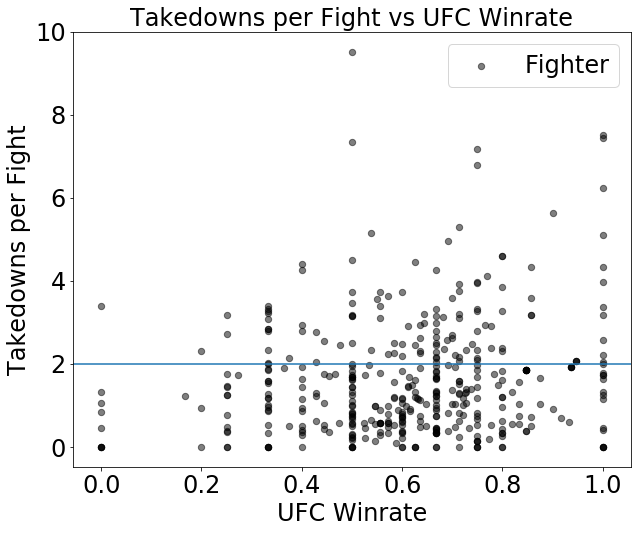

In [18]:
fig, ax = plt.subplots(figsize=(10, 8))

UFC_win.plot.scatter(x = "UFC_winrate", y ="takedAv_per", c='black', ax=ax, s=40, alpha=.5, label =  'Fighter')
ax.axhline(y=2)

plt.title("Takedowns per Fight vs UFC Winrate", fontsize=24)
plt.xlabel("UFC Winrate")
plt.ylabel("Takedowns per Fight")

ax.legend()

There doesn't seem to be much correlation. We decided to draw a line at 2 because maybe there's  a slight correlation once you go over two takedowns per fight but nothing concrete. Some non wrestling focused fighters might throw one or two takedowns per fight just to mix things up, while throwing more than two might indicate that you are a much more natural wrestler.